## Handling Missing Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# use parse dates to convert string day to datetime 
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv', parse_dates = ['day'])
type(df['day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
df.set_index('day', inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [5]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [6]:
# now select the specific filling values for each column

new_df = df.fillna({
    'temperature': 0,
    'windspeed': 0,
    'event': 'no event'
})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [7]:
# for forward filling, bfill for backward filling
new_df = df.fillna(method = 'ffill')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [12]:
new_df = df.fillna(method = 'ffill', axis = 'columns')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,28.0,Snow
2017-01-06,NaN,7.0,7.0
2017-01-07,32.0,32.0,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [13]:
# only one value is fill 
new_df = df.fillna(method = 'ffill', limit= 1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [17]:
# you can use interpolate for better guess
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [18]:
# Interpolate chooses the middle value for the missing value but date is not increasing by order of 1 
# so u can use time method for better guessing
new_df = df.interpolate(method = 'time')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [19]:
# Dropping null values
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [20]:
# Dropping only those rows which has all null values except index

new_df = df.dropna(how = 'all')
new_d

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [21]:
# Dropping only those rows which has less than specified non nan

new_df = df.dropna(thresh = 1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [24]:
#filling gaps bw dates

dt = pd.date_range('01-01-2017', '01-11-2017')
idx = pd.DatetimeIndex(dt)
df = df.reindex(idx)
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


## Replace Methods


In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/6_handling_missing_data_replace/weather_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [26]:
new_df = df.replace(-99999, 0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [27]:
# replace multiple values

new_df = df.replace([-99999, 2], 0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,0,Sunny
6,1/6/2017,34,5,0


In [28]:
# replace using dictionary

new_df = df.replace({
    'temperature': -99999,
    'windspeed': -99999,
    'event': 0
}, 0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [31]:
# replace values using dictionary

new_df = df.replace({
    -99999: 0,
    'Snow': 'Rain'
})
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Rain
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [3]:
df = pd.DataFrame({
    'Score': ['excellent', 'good', 'poor'],
    'Student': ['Mushi', 'Ali', 'Ahmed']
})
df

,Score,Student
0,excellent,Mushi
1,good,Ali
2,poor,Ahmed


In [4]:
new_df = df.replace(['excellent', 'good', 'poor'], [3,2,1])
new_df

,Score,Student
0,3,Mushi
1,2,Ali
2,1,Ahmed


## GroupBy Function

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [7]:
# grouping using city 
g = df.groupby('city')
g

In [9]:
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [10]:
g.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_4784\2978112660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [11]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      AxesSubplot(0.125,0.11;0.775x0.77)
new york    AxesSubplot(0.125,0.11;0.775x0.77)
paris       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

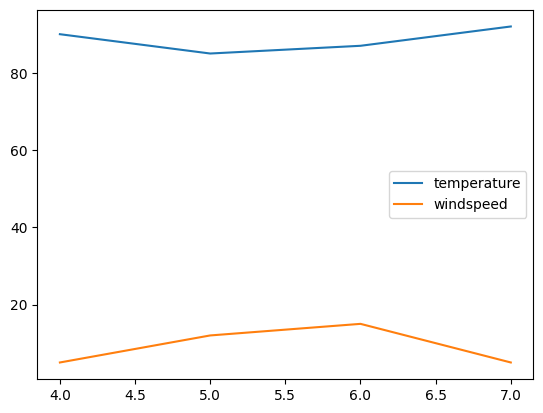

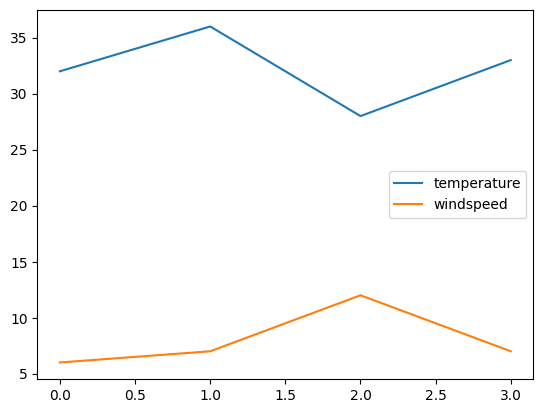

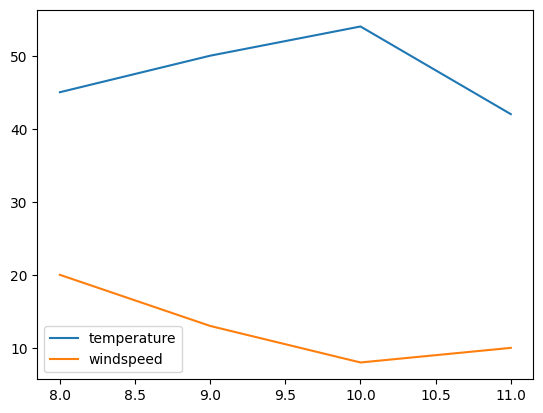

In [15]:
%matplotlib inline
g.plot()

## Concatenating two DataFrames

In [16]:
pakistan_df = pd.DataFrame({
    'city': ['Karachi', 'Islamabad', 'Lahore'],
    'temperature': [34, 40, 38]
})

pakistan_df


,city,temperature
0,Karachi,34
1,Islamabad,40
2,Lahore,38


In [17]:
us_df = pd.DataFrame({
    'city': ['Chicago', 'NY', 'Texas'],
    'temperature': [22, 13, 16]
})
us_df


,city,temperature
0,Chicago,22
1,NY,13
2,Texas,16


In [21]:
concat_df = pd.concat([pakistan_df, us_df], ignore_index = True) # we can set ignore_index = True for ignoring the index
concat_df

,city,temperature
0,Karachi,34
1,Islamabad,40
2,Lahore,38
3,Chicago,22
4,NY,13
5,Texas,16


In [23]:
concat_df = pd.concat([pakistan_df, us_df], keys = ['Pakistan', 'US']) 
concat_df

city  temperature
Pakistan 0    Karachi           34
         1  Islamabad           40
         2     Lahore           38
US       0    Chicago           22
         1         NY           13
         2      Texas           16

In [26]:
concat_df.loc['US']

,city,temperature
0,Chicago,22
1,NY,13
2,Texas,16


In [31]:
# concatenating column wise
temp_df = pd.DataFrame({
    'city': ['karachi', 'islamabad', 'lahore'],
    'temperature': [33, 34, 40]
})

wind_df = pd.DataFrame({
    'city': ['karachi', 'islamabad', 'lahore'],
    'windspeed': [60, 55, 46]
})
concat_df = pd.concat([temp_df, wind_df], axis = 1)
concat_df

,city,temperature,city,windspeed
0,karachi,33,karachi,60
1,islamabad,34,islamabad,55
2,lahore,40,lahore,46


In [33]:
# if the columns become lesser in one DF and Index also mismatches we set the index parameter

temp_df = pd.DataFrame({
    'city': ['karachi', 'islamabad', 'lahore'],
    'temperature': [33, 34, 40]
}, index = [0, 1, 2])

wind_df = pd.DataFrame({
    'city': [ 'islamabad', 'lahore'],
    'windspeed': [55, 46]
}, index = [1, 2])

concat_df = pd.concat([temp_df, wind_df], axis = 1)
concat_df

,city,temperature,city,windspeed
0,karachi,33,NaN,NaN
1,islamabad,34,islamabad,55.0
2,lahore,40,lahore,46.0


In [34]:
# Concatenating series in to DF 

s = pd.Series(['humid', 'dry', 'cloudy'], name = 'event')
s

0     humid
1       dry
2    cloudy
Name: event, dtype: object

In [36]:
concat_df = pd.concat([temp_df, s], axis = 1)
concat_df

,city,temperature,event
0,karachi,33,humid
1,islamabad,34,dry
2,lahore,40,cloudy


## Merging DataFrame

In [40]:
temp_df = pd.DataFrame({
    'city': ['karachi', 'islamabad', 'lahore'],
    'temperature': [33, 34, 40]
})

wind_df = pd.DataFrame({
    'city': ['karachi', 'islamabad'],
    'windspeed': [60, 55]
})

merge_df = pd.merge(temp_df, wind_df, on = 'city')
merge_df

,city,temperature,windspeed
0,karachi,33,60
1,islamabad,34,55


In [41]:
# merge defining how to join the tables (default = inner)
merge_df = pd.merge(temp_df, wind_df, on = 'city', how = 'inner')
merge_df

,city,temperature,windspeed
0,karachi,33,60
1,islamabad,34,55


In [46]:
# you can set indicator = True that shows the value if it is from righ, eft or both

merge_df = pd.merge(temp_df, wind_df, on = 'city', how = 'outer', indicator = True)
merge_df

,city,temperature,windspeed,_merge
0,karachi,33,60.0,both
1,islamabad,34,55.0,both
2,lahore,40,NaN,left_only


In [43]:
merge_df = pd.merge(temp_df, wind_df, on = 'city', how = 'left')
merge_df

,city,temperature,windspeed
0,karachi,33,60.0
1,islamabad,34,55.0
2,lahore,40,NaN


In [44]:
merge_df = pd.merge(temp_df, wind_df, on = 'city', how = 'right')
merge_df

,city,temperature,windspeed
0,karachi,33,60
1,islamabad,34,55


In [48]:
#merging data Frames with diff values

df1 = pd.DataFrame({
    'city': ['karachi', 'islamabad', 'lahore'],
    'temperature': [33, 34, 40]
})

df2 = pd.DataFrame({
    'city': ['karachi', 'islamabad', 'lahore'],
    'temperature': [36, 32, 44]
})

df3 = pd.merge(df1, df2, on = 'city')
df3

,city,temperature_x,temperature_y
0,karachi,33,36
1,islamabad,34,32
2,lahore,40,44


In [50]:
# we can also define suffixes

df3 = pd.merge(df1, df2, on = 'city', suffixes = ('_left', '_right'))
df3

,city,temperature_left,temperature_right
0,karachi,33,36
1,islamabad,34,32
2,lahore,40,44


## pivot_table

    pivot_table is used to summarize your dataframe

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [53]:
pivot_df = df.pivot_table(index = 'day', columns = 'city')
pivot_df

C:\Users\HP\AppData\Local\Temp\ipykernel_4784\2943002206.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df = df.pivot_table(index = 'day', columns = 'city')


temperature                windspeed               
city          mumbai new york paris    mumbai new york paris
day                                                         
1/1/2017          90       32    45         5        6    20
1/2/2017          85       36    50        12        7    13
1/3/2017          87       28    54        15       12     8
1/4/2017          92       33    42         5        7    10

In [54]:
# you can also select values from dataframe

pivot_df = df.pivot_table(index = 'day', columns = 'city', values = 'temperature')
pivot_df

city,mumbai,new york,paris
day,,,
1/1/2017,90,32,45
1/2/2017,85,36,50
1/3/2017,87,28,54
1/4/2017,92,33,42


In [60]:
# you can also select aggfunc in pivoting dataframe

pivot_df = df.pivot_table(index = 'city', columns = 'day', aggfunc = 'mean', margins=True)
pivot_df

C:\Users\HP\AppData\Local\Temp\ipykernel_4784\685264966.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df = df.pivot_table(index = 'city', columns = 'day', aggfunc = 'mean', margins=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_4784\685264966.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pivot_df = df.pivot_table(index = 'city', columns = 'day', aggfunc = 'mean', margins=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_4784\685264966.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colu

temperature                                            windspeed  \
day         1/1/2017 1/2/2017   1/3/2017   1/4/2017        All   1/1/2017   
city                                                                        
mumbai     90.000000       85  87.000000  92.000000  88.500000   5.000000   
new york   32.000000       36  28.000000  33.000000  32.250000   6.000000   
paris      45.000000       50  54.000000  42.000000  47.750000  20.000000   
All        55.666667       57  56.333333  55.666667  56.166667  10.333333   

                                                  
day        1/2/2017   1/3/2017   1/4/2017    All  
city                                              
mumbai    12.000000  15.000000   5.000000   9.25  
new york   7.000000  12.000000   7.000000   8.00  
paris     13.000000   8.000000  10.000000  12.75  
All       10.666667  11.666667   7.333333  10.00

## Grouper function

In [61]:
# first changing df day column to datetime 

df['day'] = pd.to_datetime(df['day'])
type(df['day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
pivot_df = df.pivot_table(index = pd.Grouper(freq='M', key='day'), columns = 'city')
pivot_df

C:\Users\HP\AppData\Local\Temp\ipykernel_4784\2901336666.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df = df.pivot_table(index = pd.Grouper(freq='M', key='day'), columns = 'city')


temperature                 windspeed                
city            mumbai new york  paris    mumbai new york  paris
day                                                             
2017-01-31        88.5    32.25  47.75      9.25      8.0  12.75

In [64]:
# grouping by week

pivot_df = df.pivot_table(index = pd.Grouper(freq='W', key='day'), columns = 'city')
pivot_df

C:\Users\HP\AppData\Local\Temp\ipykernel_4784\3854894907.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df = df.pivot_table(index = pd.Grouper(freq='W', key='day'), columns = 'city')


temperature                        windspeed                     
city            mumbai   new york      paris     mumbai  new york      paris
day                                                                         
2017-01-01        90.0  32.000000  45.000000   5.000000  6.000000  20.000000
2017-01-08        88.0  32.333333  48.666667  10.666667  8.666667  10.333333

## melt function

In [70]:
df = pd.DataFrame({
    'day': ['mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun'],
    'chicago':[22,23, 21, 33, 31, 29,30],
    'NY':[22,23, 21, 33, 31, 29,30]
})

df

,day,chicago,NY
0,mon,22,22
1,tues,23,23
2,wed,21,21
3,thurs,33,33
4,fri,31,31
5,sat,29,29
6,sun,30,30


In [73]:
df1 = pd.melt(df, id_vars=['day'], var_name='city', value_name='temperature')
df1


,day,city,temperature
0,mon,chicago,22
1,tues,chicago,23
2,wed,chicago,21
3,thurs,chicago,33
4,fri,chicago,31
5,sat,chicago,29
6,sun,chicago,30
7,mon,NY,22
8,tues,NY,23
9,wed,NY,21


In [76]:
df.stack(level=0)

0  day          mon
   chicago       22
   NY            22
1  day         tues
   chicago       23
   NY            23
2  day          wed
   chicago       21
   NY            21
3  day        thurs
   chicago       33
   NY            33
4  day          fri
   chicago       31
   NY            31
5  day          sat
   chicago       29
   NY            29
6  day          sun
   chicago       30
   NY            30
dtype: object

## Crosstab

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [80]:
df1 = pd.crosstab(df.day, df.city)
df1

city,mumbai,new york,paris
day,,,
1/1/2017,1,1,1
1/2/2017,1,1,1
1/3/2017,1,1,1
1/4/2017,1,1,1


In [81]:
df1 = pd.crosstab(df.city, df.event)
df1

event,Cloudy,Fog,Rain,Snow,Sunny
city,,,,,
mumbai,0,2,1,0,1
new york,0,0,1,1,2
paris,3,0,0,0,1


In [83]:
# normalizing crosstab, index will give u the percentage 
df1 = pd.crosstab(df.city, df.event, normalize = 'index')
df1

event,Cloudy,Fog,Rain,Snow,Sunny
city,,,,,
mumbai,0.00,0.5,0.25,0.00,0.25
new york,0.00,0.0,0.25,0.25,0.50
paris,0.75,0.0,0.00,0.00,0.25


In [84]:
# finding the average temperature for each city in diff events

df1 = pd.crosstab(df.city, df.event, values = df.temperature, aggfunc = np.average)
df1

event,Cloudy,Fog,Rain,Snow,Sunny
city,,,,,
mumbai,NaN,86.0,92.0,NaN,90.0
new york,NaN,NaN,32.0,28.0,34.5
paris,48.666667,NaN,NaN,NaN,45.0


## Time Series

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/14_ts_datetimeindex/aapl.csv', parse_dates=['Date'], index_col = 'Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [4]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [16]:
df[df.index == '2017-07-07']

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.9,144.75,142.9,144.18,19201712


In [17]:
df['2017-06']

C:\Users\HP\AppData\Local\Temp\ipykernel_7848\2147835895.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06']


,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-06-29,144.71,145.13,142.28,143.68,31499368
2017-06-28,144.49,146.11,143.16,145.83,22082432
2017-06-27,145.01,146.16,143.62,143.73,24761891
2017-06-26,147.17,148.28,145.38,145.82,25692361
2017-06-23,145.13,147.16,145.11,146.28,35439389
2017-06-22,145.77,146.70,145.12,145.63,19106294
2017-06-21,145.52,146.07,144.61,145.87,21265751
2017-06-20,146.87,146.87,144.94,145.01,24900073


In [18]:
df['2017-06'].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_7848\3773395190.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06'].head()


,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-06-29,144.71,145.13,142.28,143.68,31499368
2017-06-28,144.49,146.11,143.16,145.83,22082432
2017-06-27,145.01,146.16,143.62,143.73,24761891
2017-06-26,147.17,148.28,145.38,145.82,25692361


In [19]:
df['2017-06'].Close.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_7848\2742124876.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06'].Close.mean()


147.8313636363636

## Resampling 

In [24]:
# resampling with month frequency

df.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

<AxesSubplot: xlabel='Date'>

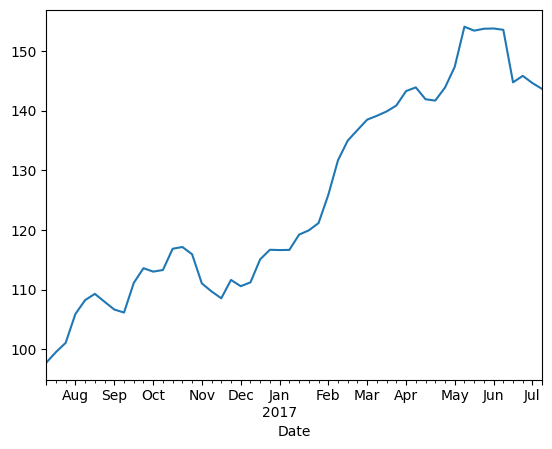

In [25]:
%matplotlib inline
df.Close.resample('W').mean().plot()

## DateRange

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/15_ts_date_range/aapl_no_dates.csv')
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [27]:
rng = pd.date_range(start="6/1/2016",end="6/30/2016", freq='B')
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [30]:
df.set_index(rng, inplace=True)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


In [31]:
df['2016-06-02': '2016-06-10']

,Open,High,Low,Close,Volume
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [33]:
df['2016-06-02': '2016-06-10'].Close

2016-06-02    155.45
2016-06-03    153.93
2016-06-06    154.45
2016-06-07    155.37
2016-06-08    154.99
2016-06-09    148.98
2016-06-10    145.42
Freq: B, Name: Close, dtype: float64

In [34]:
# Now changing the date frequency of index to days

df.asfreq('D', method = 'pad')

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [35]:
# for hours
df.asfreq('H', method = 'pad')

,Open,High,Low,Close,Volume
2016-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
...,...,...,...,...,...
2016-06-29 20:00:00,144.71,145.13,142.28,143.68,31499368
2016-06-29 21:00:00,144.71,145.13,142.28,143.68,31499368
2016-06-29 22:00:00,144.71,145.13,142.28,143.68,31499368
2016-06-29 23:00:00,144.71,145.13,142.28,143.68,31499368


## Generating DateTimeIndex using periods 

In [37]:
rng = pd.date_range('1/1/2022', periods=72, freq='D')
rng

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
      

In [39]:
ts = pd.Series(np.random.randint(1, 10, len(rng)), index = rng)
ts

2022-01-01    7
2022-01-02    5
2022-01-03    8
2022-01-04    1
2022-01-05    7
             ..
2022-03-09    8
2022-03-10    3
2022-03-11    2
2022-03-12    6
2022-03-13    8
Freq: D, Length: 72, dtype: int32

## US Business Calendar

In [42]:
# excluding US holidays

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",periods = 22, freq=us_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02'],
              dtype='datetime64[ns]', freq='C')

In [43]:
df.set_index(rng)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


## AbstractHolidayCalendar

In [44]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=12, day=10),#, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('12/1/2017','12/30/2017',freq=my_bday)

DatetimeIndex(['2017-12-01', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14', '2017-12-15', '2017-12-18',
               '2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29'],
              dtype='datetime64[ns]', freq='C')

## CustomBusinessDay
Weekend in egypt is Friday and Saturday. Sunday is just a normal weekday and you can handle this custom week schedule using CystomBysinessDay with weekmask as shown below

In [47]:

egypt_weekdays = "Sun Mon Tue Wed Thu"
b = CustomBusinessDay(weekmask = egypt_weekdays)
pd.date_range(start='07/01/2022', periods=10, freq = b)

DatetimeIndex(['2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-10', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14'],
              dtype='datetime64[ns]', freq='C')

In [48]:
# you can also add your own holidays

b = CustomBusinessDay(holidays=['2017-07-04', '2017-07-10'], weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-09', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='C')

## to_datetimr function

In [2]:

dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [3]:
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

## Different Styles of Dates

#### Europeon Style
    day/month/year

#### US Style
    month/day/year

In [6]:
# writning date in Europeon style

date = "16/12/2022"
pd.to_datetime(date, dayfirst=True)

Timestamp('2022-12-16 00:00:00')

## Custom date time format

In [9]:
pd.to_datetime('2017$12$10', format='%Y$%m$%d')

Timestamp('2017-12-10 00:00:00')

## Handling Invalid dates

In [11]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')

Index(['2017-01-05', 'Jan 6, 2017', 'abc'], dtype='object')

In [13]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce') # NaT stands for, Not a timestamp

DatetimeIndex(['2017-01-05', '2017-01-06', 'NaT'], dtype='datetime64[ns]', freq=None)

## Epoch
Epoch or Unix time means number of seconds that have passed since Jan 1, 1970 00:00:00 UTC time/

In [14]:
current_epoch = 1501324478
pd.to_datetime(current_epoch, unit='s')

Timestamp('2017-07-29 10:34:38')

In [15]:
pd.to_datetime(current_epoch*1000, unit='ms')

Timestamp('2017-07-29 10:34:38')

In [16]:
t = pd.to_datetime([current_epoch], unit='s')
t


DatetimeIndex(['2017-07-29 10:34:38'], dtype='datetime64[ns]', freq=None)

In [17]:
t.view('int64')

array([1501324478000000000], dtype=int64)

## Yearly Period

In [18]:
y = pd.Period("2022")
y

Period('2022', 'A-DEC')

In [19]:
y.start_time

Timestamp('2022-01-01 00:00:00')

In [20]:
y.end_time

Timestamp('2022-12-31 23:59:59.999999999')

In [21]:
y.is_leap_year

False

## Monthly Period

In [23]:
y = pd.Period("2022-12")
y

Period('2022-12', 'M')

In [24]:
y.start_time

Timestamp('2022-12-01 00:00:00')

In [25]:
y.end_time

Timestamp('2022-12-31 23:59:59.999999999')

In [27]:
y+4

Period('2023-04', 'M')

## Daily Period

In [28]:
d = pd.Period("2022-12-10", freq = 'D')
d

Period('2022-12-10', 'D')

In [29]:
d.start_time

Timestamp('2022-12-10 00:00:00')

In [30]:
d.end_time

Timestamp('2022-12-10 23:59:59.999999999')

In [31]:
d+3

Period('2022-12-13', 'D')

## Hourly Period

In [32]:
h = pd.Period('2022-12-10 23:00:00', freq='H')
h

Period('2022-12-10 23:00', 'H')

In [33]:
h+1

Period('2022-12-11 00:00', 'H')

In [35]:
#same addition can be done usinf offset

h + pd.offsets.Hour(4)

Period('2022-12-11 03:00', 'H')

## Quarterly Period

In [36]:
q1 = pd.Period('2017Q1', freq = 'Q-JAN')
q1

Period('2017Q1', 'Q-JAN')

In [37]:
q1.start_time

Timestamp('2016-02-01 00:00:00')

In [38]:
q1.end_time

Timestamp('2016-04-30 23:59:59.999999999')

In [41]:
# use asfreq to change the frequency

q1.asfreq('M', how='start')

Period('2016-02', 'M')

In [42]:
q1.asfreq('M', how='end')

Period('2016-04', 'M')

In [44]:
w = pd.Period('2022-2-10', freq ='W')
w

Period('2022-02-07/2022-02-13', 'W-SUN')

In [46]:
w2 = pd.Period('2022-3-15', freq='W')
w2

Period('2022-03-14/2022-03-20', 'W-SUN')

In [47]:
w2-w

<5 * Weeks: weekday=6>

## PeriodIndex and PeriodRange

In [49]:
r = pd.period_range('2018', '2022', freq = 'q')
r

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
             '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1'],
            dtype='period[Q-DEC]')

In [50]:
r[0].start_time

Timestamp('2018-01-01 00:00:00')

In [51]:
r[0].end_time

Timestamp('2018-03-31 23:59:59.999999999')

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/18_ts_period/wmt.csv')
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [70]:
df.set_index('Line Item', inplace = True)
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [71]:
# it is object type
df.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [72]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [73]:
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]')

In [82]:
df.drop('start time', axis=1, inplace=True)
df.drop('end time', axis=1, inplace=True)

In [83]:
# Adding start and end time column to the DF

df['Start Date'] = df.index.map(lambda x: x.start_time)
df


Line Item,Revenue,Expenses,Profit,Start Date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [84]:
# Adding start and end time column to the DF

df['End Date'] = df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [86]:
df['End Date'] = pd.to_datetime(df['End Date']).dt.normalize()
df

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30
2017Q2,120854,89485,31369,2016-05-01,2016-07-31
2017Q3,118179,87484,30695,2016-08-01,2016-10-31
2017Q4,130936,97743,33193,2016-11-01,2017-01-31
2018Q1,117542,87688,29854,2017-02-01,2017-04-30


In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/19_ts_timezone/msft.csv', header=1, index_col='Date Time', parse_dates = True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [117]:
df.index[0]

Timestamp('2017-08-17 09:00:00')

## Two types of datetimes in python
Naive (no timezone awareness)
Timezone aware datetime


In [118]:
df.tz_localize(tz = 'US/Eastern')
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [119]:
df.index = df.index.tz_localize(tz = "US/Eastern")
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

## Convert to Berlin TZ

In [122]:
df = df.tz_convert('Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [123]:
from pytz import all_timezones
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

## Convert to Karachi TZ

In [125]:
df = df.tz_convert('Asia/Karachi')
df

,Price
Date Time,
2017-08-17 18:00:00+05:00,72.38
2017-08-17 18:15:00+05:00,71.00
2017-08-17 18:30:00+05:00,71.67
2017-08-17 19:00:00+05:00,72.80
2017-08-17 19:30:00+05:00,73.00
2017-08-17 20:00:00+05:00,72.50


In [126]:
london = pd.date_range('2022-12-10', periods = 10, freq='H', tz = "Europe/London")
london

DatetimeIndex(['2022-12-10 00:00:00+00:00', '2022-12-10 01:00:00+00:00',
               '2022-12-10 02:00:00+00:00', '2022-12-10 03:00:00+00:00',
               '2022-12-10 04:00:00+00:00', '2022-12-10 05:00:00+00:00',
               '2022-12-10 06:00:00+00:00', '2022-12-10 07:00:00+00:00',
               '2022-12-10 08:00:00+00:00', '2022-12-10 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

In [127]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10), index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [130]:
k = s.tz_localize('Asia/Karachi')
k

2017-08-22 09:00:00+05:00    0
2017-08-22 09:30:00+05:00    1
2017-08-22 10:00:00+05:00    2
2017-08-22 10:30:00+05:00    3
2017-08-22 11:00:00+05:00    4
2017-08-22 11:30:00+05:00    5
2017-08-22 12:00:00+05:00    6
2017-08-22 12:30:00+05:00    7
2017-08-22 13:00:00+05:00    8
2017-08-22 13:30:00+05:00    9
dtype: int64

In [131]:
b = s.tz_localize(tz="Europe/Berlin")
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

### It will first convert individual timezones to UTC and then align datetimes to perform addition/subtraction etc. operations

In [133]:
b + k

2017-08-22 09:00:00+05:00     0
2017-08-22 09:30:00+05:00     2
2017-08-22 10:00:00+05:00     4
2017-08-22 10:30:00+05:00     6
2017-08-22 11:00:00+05:00     8
2017-08-22 11:30:00+05:00    10
2017-08-22 12:00:00+05:00    12
2017-08-22 12:30:00+05:00    14
2017-08-22 13:00:00+05:00    16
2017-08-22 13:30:00+05:00    18
dtype: int64

## Shifting the data points

In [135]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/20_shift_lag/fb.csv', index_col = 'Date')
df

,Price
Date,
15-Aug-17,171.00
16-Aug-17,170.00
17-Aug-17,166.91
18-Aug-17,167.41
21-Aug-17,167.78
22-Aug-17,169.64
23-Aug-17,168.71
24-Aug-17,167.74
25-Aug-17,166.32


In [137]:
# shifting the data points to 1
df.shift(1)

,Price
Date,
15-Aug-17,NaN
16-Aug-17,171.00
17-Aug-17,170.00
18-Aug-17,166.91
21-Aug-17,167.41
22-Aug-17,167.78
23-Aug-17,169.64
24-Aug-17,168.71
25-Aug-17,167.74


In [138]:
# shifting data points to -1
df.shift(-1)

,Price
Date,
15-Aug-17,170.00
16-Aug-17,166.91
17-Aug-17,167.41
18-Aug-17,167.78
21-Aug-17,169.64
22-Aug-17,168.71
23-Aug-17,167.74
24-Aug-17,166.32
25-Aug-17,167.24


In [141]:
df['Prev day price'] = df['Price'].shift(1)
df

,Price,Prev day price
Date,,
15-Aug-17,171.00,NaN
16-Aug-17,170.00,171.00
17-Aug-17,166.91,170.00
18-Aug-17,167.41,166.91
21-Aug-17,167.78,167.41
22-Aug-17,169.64,167.78
23-Aug-17,168.71,169.64
24-Aug-17,167.74,168.71
25-Aug-17,166.32,167.74


In [143]:
df['Price Change'] = df['Price'] - df['Prev day price'] 
df

,Price,Prev day price,Price Change
Date,,,
15-Aug-17,171.00,NaN,NaN
16-Aug-17,170.00,171.00,-1.00
17-Aug-17,166.91,170.00,-3.09
18-Aug-17,167.41,166.91,0.50
21-Aug-17,167.78,167.41,0.37
22-Aug-17,169.64,167.78,1.86
23-Aug-17,168.71,169.64,-0.93
24-Aug-17,167.74,168.71,-0.97
25-Aug-17,166.32,167.74,-1.42


In [144]:
df['5 day return'] =  (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev day price,Price Change,5 day return
Date,,,,
15-Aug-17,171.00,NaN,NaN,NaN
16-Aug-17,170.00,171.00,-1.00,NaN
17-Aug-17,166.91,170.00,-3.09,NaN
18-Aug-17,167.41,166.91,0.50,NaN
21-Aug-17,167.78,167.41,0.37,NaN
22-Aug-17,169.64,167.78,1.86,-0.795322
23-Aug-17,168.71,169.64,-0.93,-0.758824
24-Aug-17,167.74,168.71,-0.97,0.497274
25-Aug-17,166.32,167.74,-1.42,-0.651096


## tshift

In [145]:
df.index

Index(['15-Aug-17', '16-Aug-17', '17-Aug-17', '18-Aug-17', '21-Aug-17',
       '22-Aug-17', '23-Aug-17', '24-Aug-17', '25-Aug-17', '28-Aug-17'],
      dtype='object', name='Date')

In [146]:
type(df.index[0])

str

In [147]:
idx = pd.date_range('2017-8-15', periods= 10, freq='B')
idx

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [149]:
df.index = idx
df

,Price,Prev day price,Price Change,5 day return
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096
2017-08-28,167.24,166.32,0.92,-0.321850


In [150]:
df.tshift(1)

C:\Users\HP\AppData\Local\Temp\ipykernel_5284\4060579993.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(1)


,Price,Prev day price,Price Change,5 day return
2017-08-16,171.00,NaN,NaN,NaN
2017-08-17,170.00,171.00,-1.00,NaN
2017-08-18,166.91,170.00,-3.09,NaN
2017-08-21,167.41,166.91,0.50,NaN
2017-08-22,167.78,167.41,0.37,NaN
2017-08-23,169.64,167.78,1.86,-0.795322
2017-08-24,168.71,169.64,-0.93,-0.758824
2017-08-25,167.74,168.71,-0.97,0.497274
2017-08-28,166.32,167.74,-1.42,-0.651096
2017-08-29,167.24,166.32,0.92,-0.321850
